In [1]:
import scanpy as sc 
import pandas as pd 
import matplotlib.pyplot as pl 
import scvelo as scvelo

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.2 pynndescent==0.5.11


In [4]:
adata_ref= sc.read_h5ad("filtered_gene_bc_matrices/GSE132771/NML_integrated.h5ad")

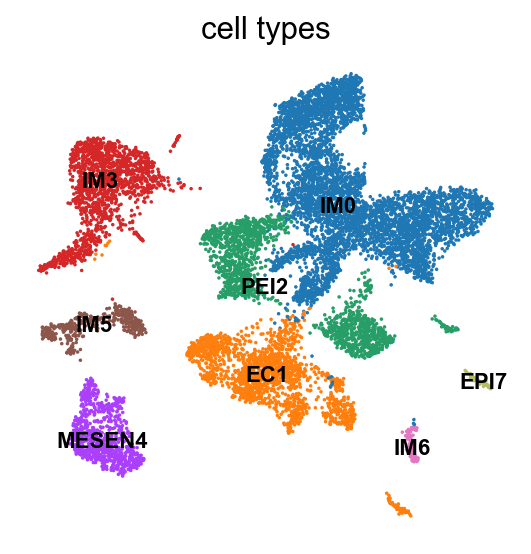

In [5]:
sc.pl.umap(adata_ref, color= 'leiden', legend_loc='on data', legend_fontsize=10, title= 'cell types', frameon= False)

In [6]:
adata1= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE1208033/NOR1/", 
                       var_names= "gene_symbols", cache= True)

... writing an h5ad cache file to speedup reading next time


In [7]:
adata1.var_names_make_unique()

In [8]:
adata2= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE1208033/NOR2/", 
                       var_names= "gene_symbols", cache= True)

... writing an h5ad cache file to speedup reading next time


In [9]:
adata2.var_names_make_unique()

In [10]:
adata3= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE1208033/NOR3/", 
                       var_names= "gene_symbols", cache= True)

... writing an h5ad cache file to speedup reading next time


In [11]:
adata3.var_names_make_unique()

In [12]:
adata= adata1.concatenate([adata2, adata3], batch_categories= ['NRO1', 'NRO2', 'NRO3'])

In [13]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells= 3)

filtered out 2208189 cells that have less than 200 genes expressed
filtered out 17244 genes that are detected in less than 3 cells


In [14]:
adata.var['mt']= adata.var_names.str.startswith('MT-') # Annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars= ["mt"], percent_top= None, log1p= False, inplace= True)

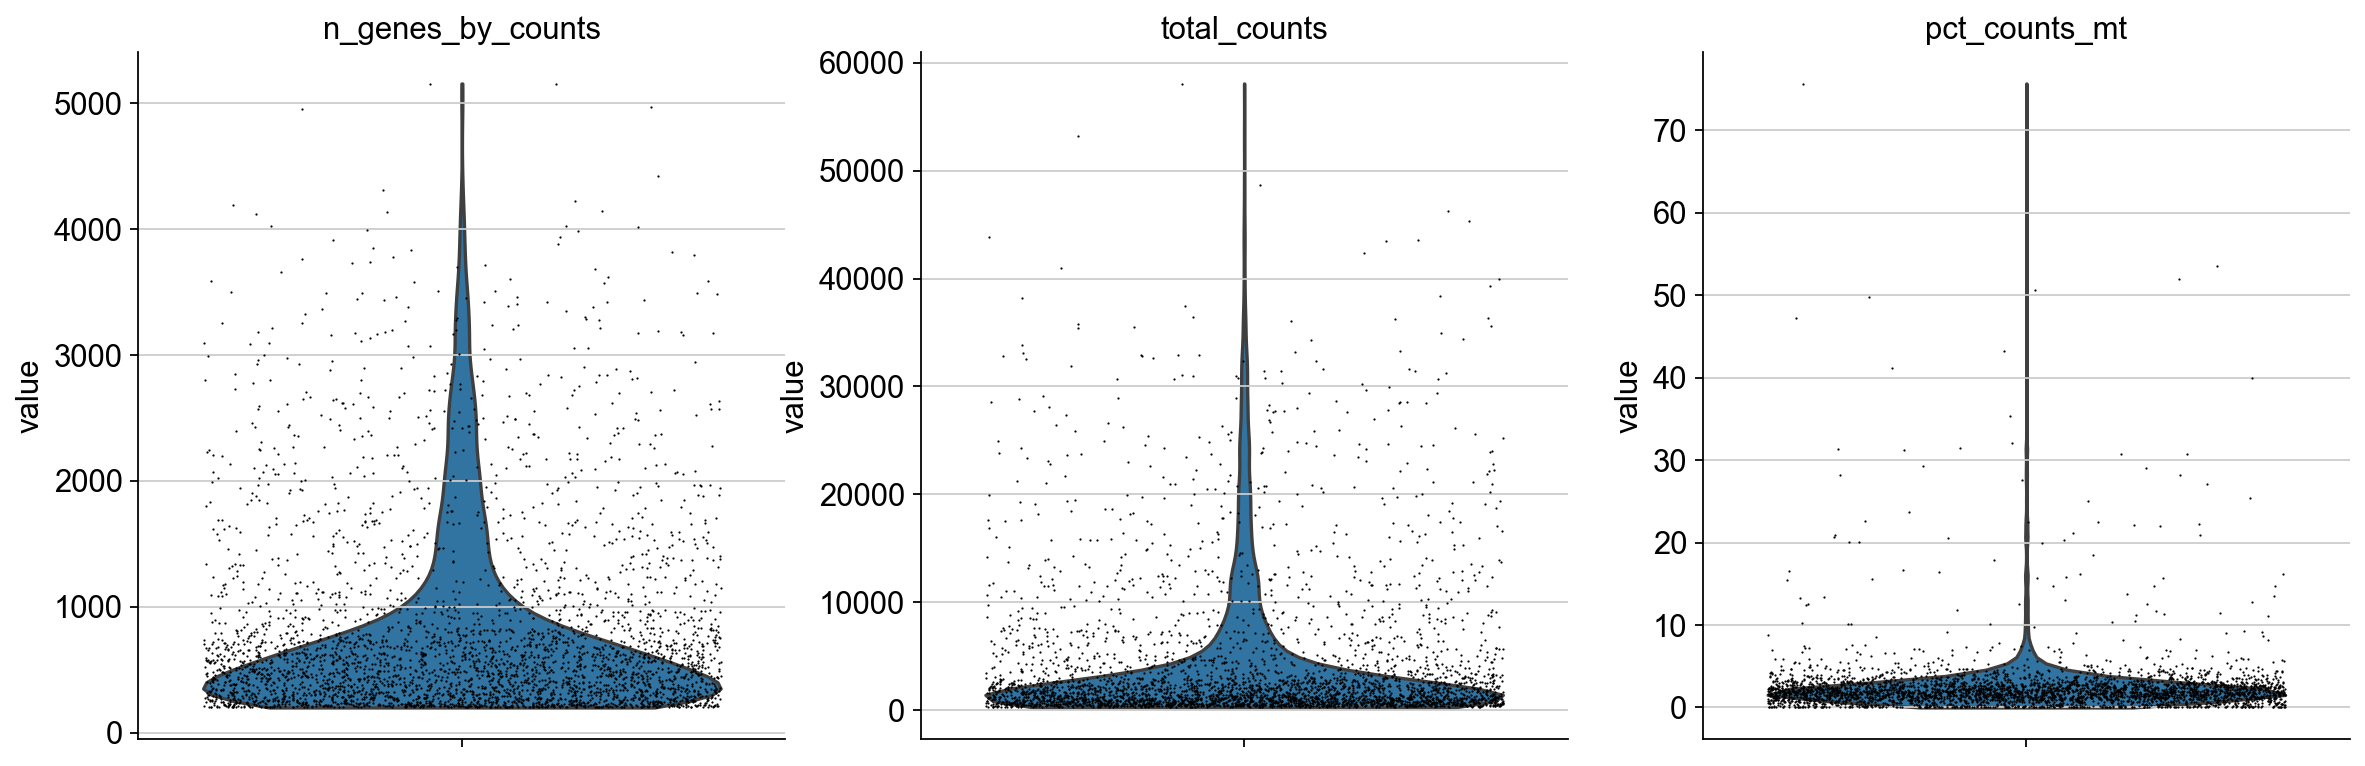

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel= True)

In [16]:
adata= adata[adata.obs.n_genes_by_counts <4000, :]
adata= adata[adata.obs.total_counts <30000, :]
adata= adata[adata.obs.pct_counts_mt <20, :]

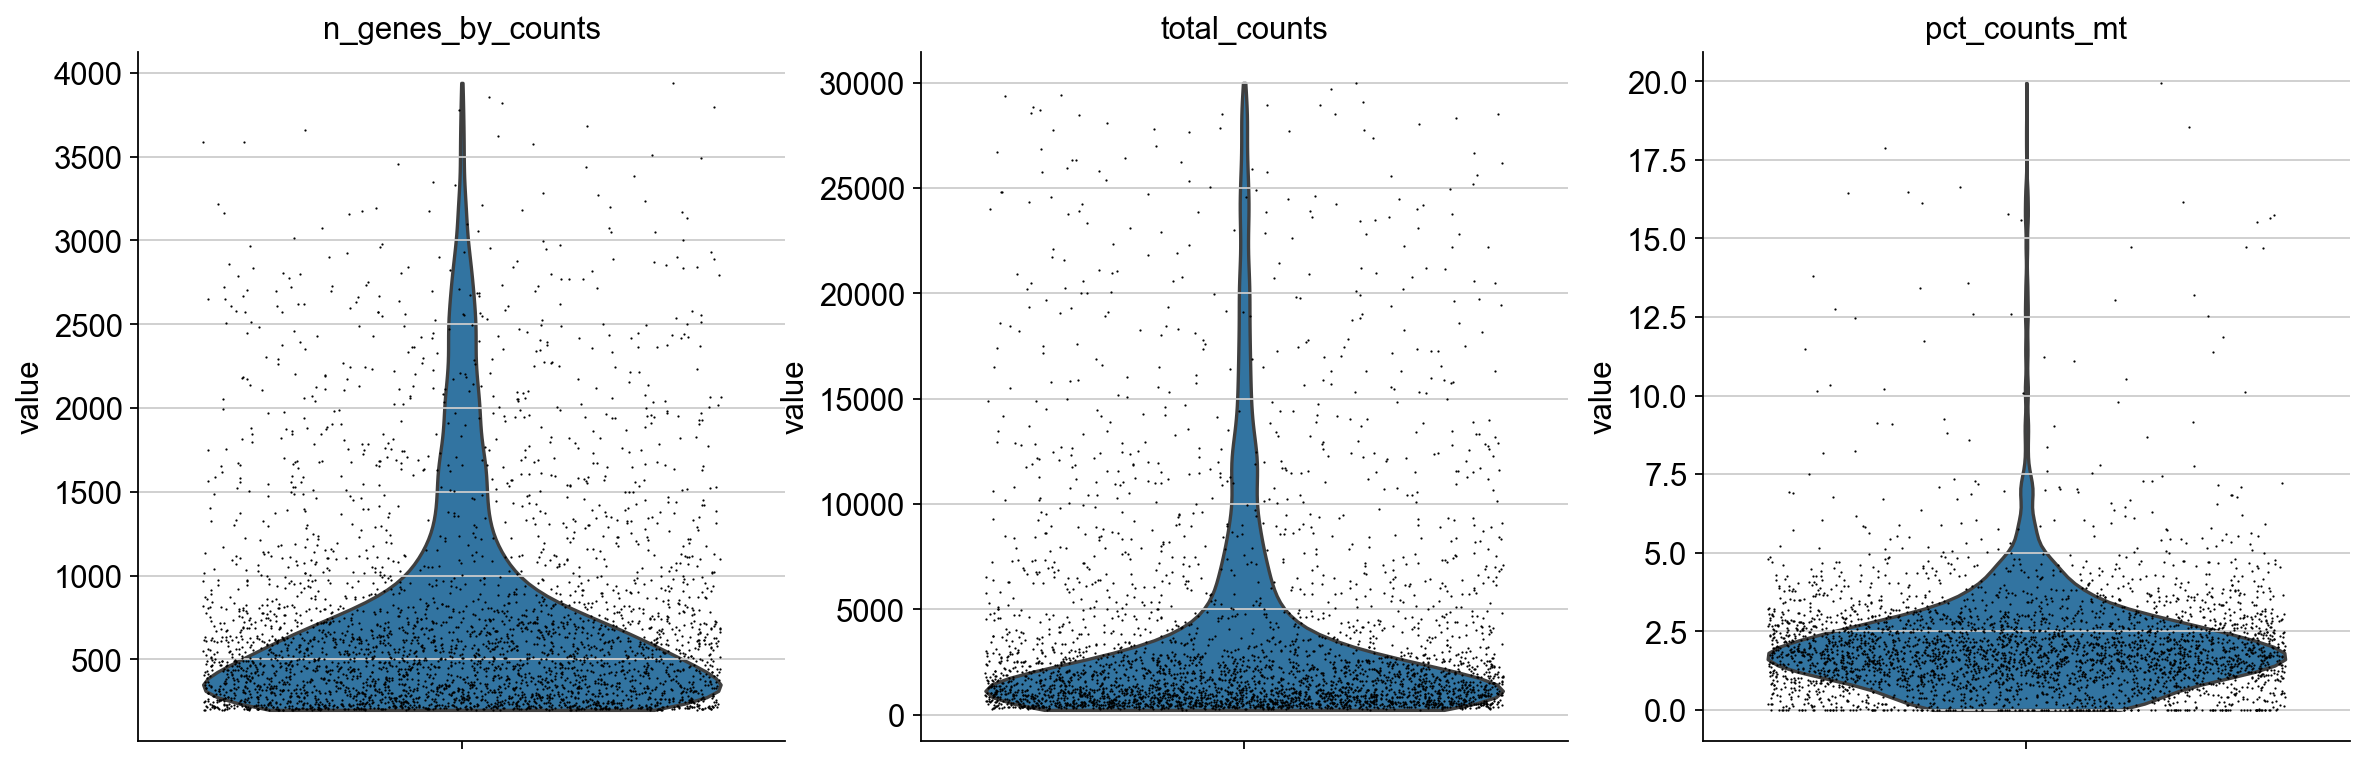

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel= True)

In [18]:
adata

View of AnnData object with n_obs × n_vars = 3552 × 16450
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
adata_ref

AnnData object with n_obs × n_vars = 11827 × 20168
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
var_names= adata_ref.var_names.intersection(adata.var_names)

In [21]:
adata_ref= adata_ref[:, var_names]

In [22]:
adata= adata[:, var_names]

In [23]:
adata_ref

View of AnnData object with n_obs × n_vars = 11827 × 16242
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp= 0.5)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.05)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


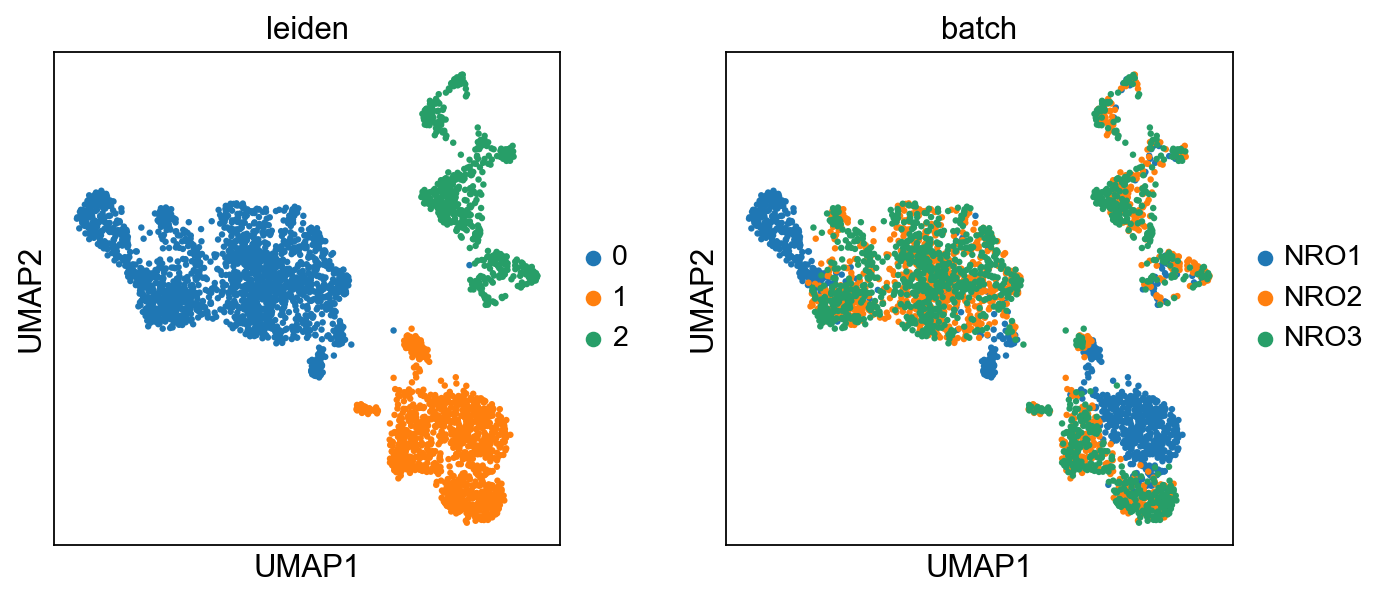

In [26]:
sc.pl.umap(adata, color=['leiden', 'batch'])

In [27]:
sc.tl.ingest(adata, adata_ref, obs= 'leiden')

running ingest
    finished (0:00:44)


In [28]:
adata_ref

View of AnnData object with n_obs × n_vars = 11827 × 16242
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [29]:
adata

AnnData object with n_obs × n_vars = 3552 × 16242
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'batch_colors'
    obsm: 'X_pca', 'X_umap', 'rep'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [31]:
adata.uns['leiden_colors']= adata_ref.uns['leiden_colors'] #fix color

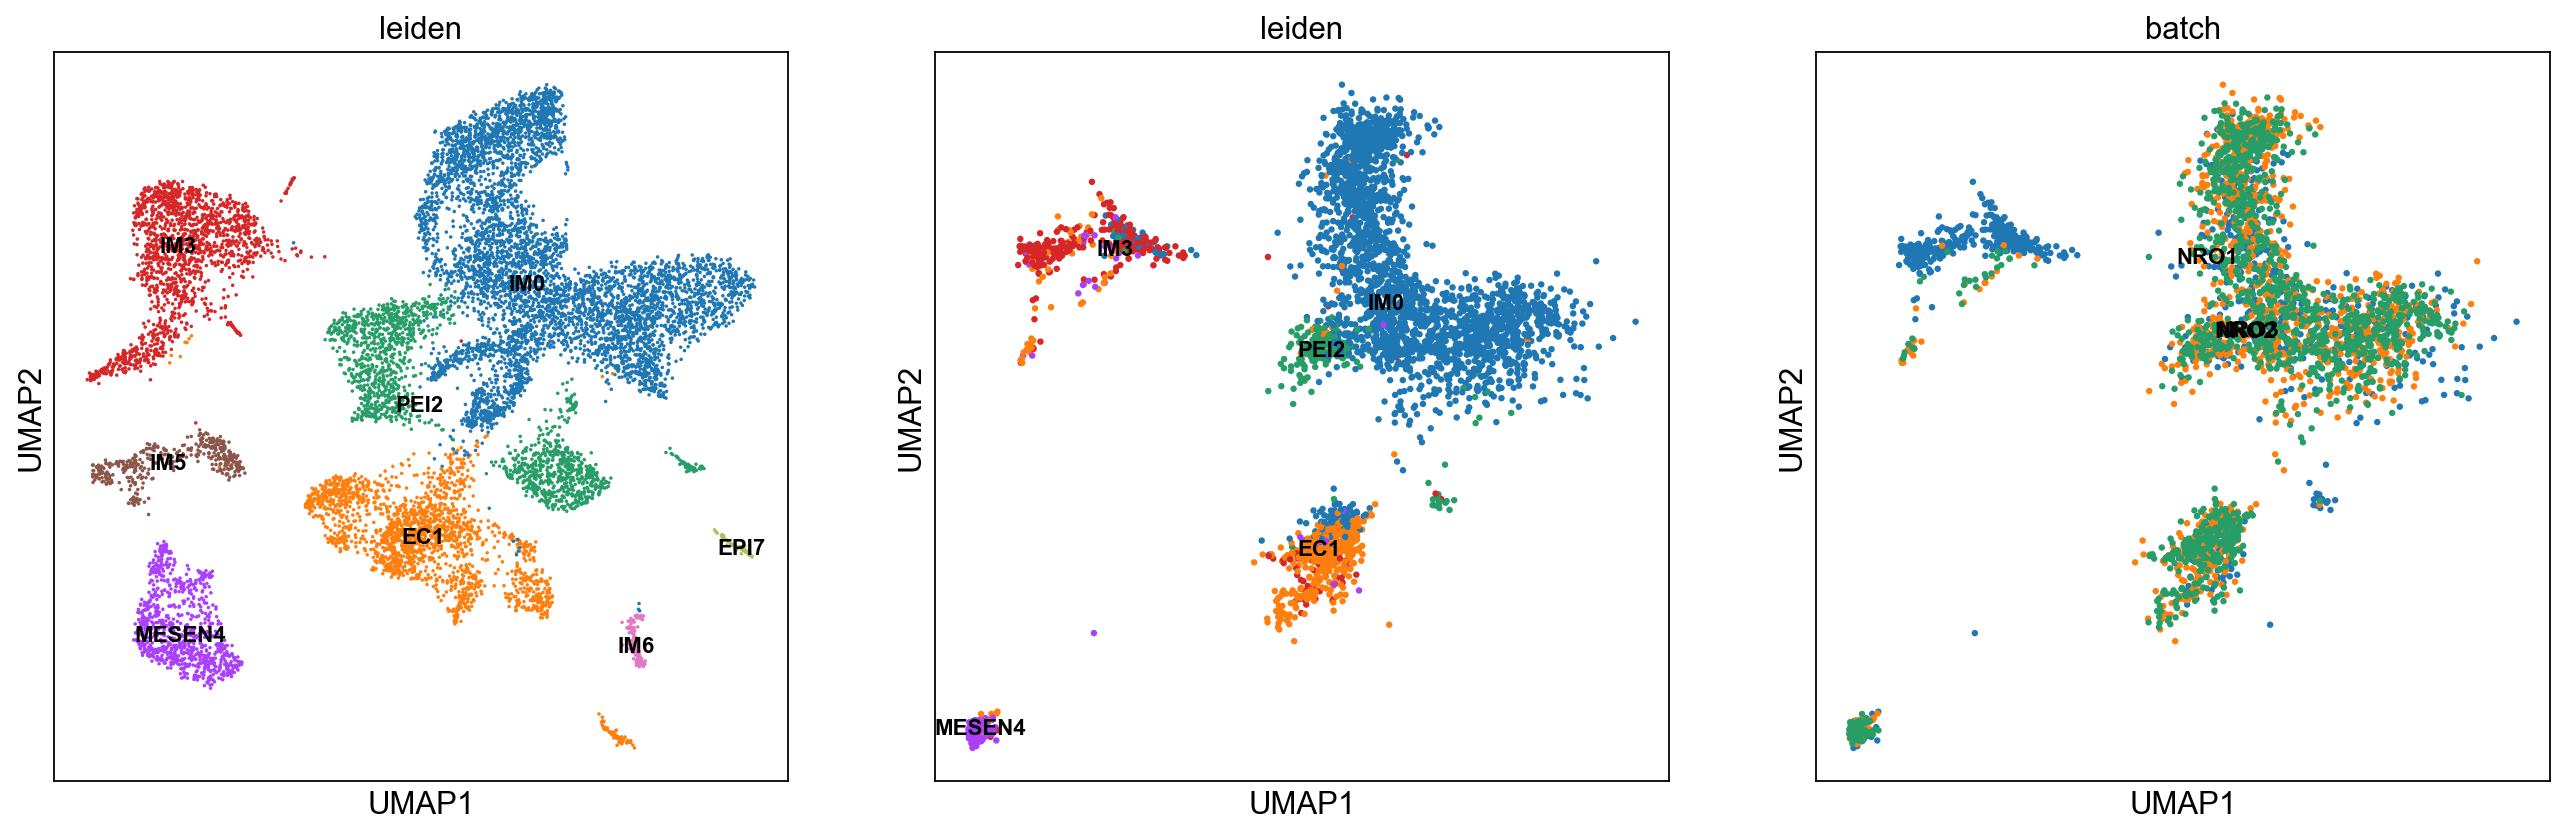

In [38]:
fig, (ax1, ax2, ax3) = pl.subplots(1, 3, figsize= (20,6))
ax1_dict = sc.pl.umap(adata_ref, color= 'leiden', legend_loc= "on data", legend_fontsize=10, ax= ax1, show= False)
ax2_dict = sc.pl.umap(adata, color= 'leiden', legend_loc= "on data", legend_fontsize=10, ax= ax2, show= False)
ax3_dict = sc.pl.umap(adata, color= 'batch', legend_loc= "on data", legend_fontsize=10, ax= ax3, show= False)